# Chapter 8 Assignment

In [4]:
#Import the pandas module and the seaborn module.
import pandas as pd
import seaborn as sns


In [6]:
#Read avocado.csv into a Pandas DataFrame and display the first five rows.
avo = pd.read_csv('avocado.csv')
print(avo.head())

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

In [8]:
#Display basic information about the DataFrame and its columns. Note the Date column has the object type
print(avo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None


In [12]:
#Convert the Date column to the datetime type. Repeat #3.
avo['Date'] = pd.to_datetime(avo['Date'])
avo.info()
print(avo.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB
   Unnamed

In [38]:
#Filter the data with query() so it contains just the rows for 2015, for the conventional type,
#and for the region named Albany.Store only the Date, Total Bags, and Small Bags columns in a new DataFrame. 
#Display the first 5 rows.
filter_avo =avo.query("year == 2015 & type == 'conventional'& region == 'Albany'")[['Date', 'Total Bags', 'Small Bags']]
print(filter_avo.head())

        Date  Total Bags  Small Bags
0 2015-12-27     8696.87     8603.62
1 2015-12-20     9505.56     9408.07
2 2015-12-13     8145.35     8042.21
3 2015-12-06     5811.16     5677.40
4 2015-11-29     6183.95     5986.26


In [51]:
#Melt the data in the Total Bags and Small Bags columns, but not the values in the Date column, 
#naming the column that contains the type of bag as Bags and the column that contains the number of bags as Count. 
#Display the melted DF.
melt_filter_avo = pd.melt(filter_avo, id_vars=['Date'], value_vars= ['Total Bags', 'Small Bags'], var_name = 'Bags', value_name ='Count')
print (melt_filter_avo)

          Date        Bags     Count
0   2015-12-27  Total Bags   8696.87
1   2015-12-20  Total Bags   9505.56
2   2015-12-13  Total Bags   8145.35
3   2015-12-06  Total Bags   5811.16
4   2015-11-29  Total Bags   6183.95
..         ...         ...       ...
99  2015-02-01  Small Bags   9170.82
100 2015-01-25  Small Bags  10103.35
101 2015-01-18  Small Bags  11651.09
102 2015-01-11  Small Bags   8036.04
103 2015-01-04  Small Bags   9186.93

[104 rows x 3 columns]


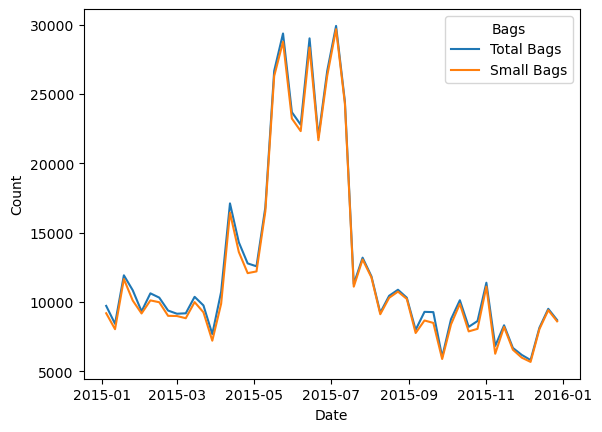

In [53]:
#Plot the melted data with a Seaborn line plot, using Date as x-axis, Count as y-axis, and Bags for the hue. 
import matplotlib.pyplot as plt
sns.lineplot(x = 'Date', y = 'Count', hue = 'Bags', data = melt_filter_avo)
plt.show()

In [61]:
#Bin the data in the Total Volume column into four quantiles labeled ‘Poor’, 
#‘Modest’, ‘Good’, and ‘Excellent’, and store the bin labels in a new column named Sales Volume. 
#Display the first five rows of the modified DF.

import numpy as np
import matplotlib.pyplot as plt
avo['Sales Volume'] = pd.qcut(avo['Total Volume'], q = 4, labels = ['Poor', 'Modest', 'Good', 'Excellent'])
print(avo.head())


   Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0           0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1 2015-12-20          1.35      54876.98   674.28   44638.81   
2           2 2015-12-13          0.93     118220.22   794.70  109149.67   
3           3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4 2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region Sales Volume  
0  2015  Albany       Modest  
1  2015  Albany       Mo

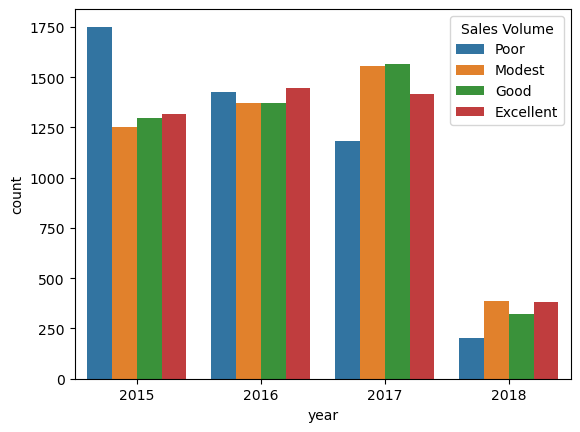

In [65]:
#Plot the binned data by year with sns.countplot().
import matplotlib.pyplot as plt
sns.countplot (x = 'year', hue =  'Sales Volume', data = avo)
plt.show()

In [71]:
#Melt the three bag size columns specifying var_name = Bags 
#and value_name = Count. Display the melted DF.
melt_avo_bag = pd.melt(avo, id_vars=['Date'], value_vars= ['Small Bags',  'Large Bags',  'XLarge Bags'],
                              var_name = 'Bags', value_name ='Count')
print (melt_avo_bag)

            Date         Bags    Count
0     2015-12-27   Small Bags  8603.62
1     2015-12-20   Small Bags  9408.07
2     2015-12-13   Small Bags  8042.21
3     2015-12-06   Small Bags  5677.40
4     2015-11-29   Small Bags  5986.26
...          ...          ...      ...
54742 2018-02-04  XLarge Bags     0.00
54743 2018-01-28  XLarge Bags     0.00
54744 2018-01-21  XLarge Bags     0.00
54745 2018-01-14  XLarge Bags     0.00
54746 2018-01-07  XLarge Bags     0.00

[54747 rows x 3 columns]


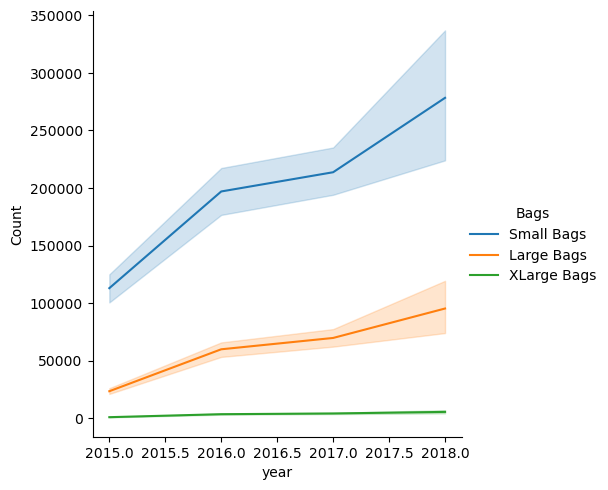

In [77]:
#Plot the bags by year using sns.relpot() with kind = line, x = year, y = Count and hue = Bags
melt_avo_bag['year'] = pd.to_datetime(melt_avo_bag['Date']).dt.year

sns.relplot(data=melt_avo_bag, kind='line', x='year', y='Count', hue='Bags')

plt.show()

## Small Bags sell the best